<a href="https://colab.research.google.com/github/aryanprasad/SentimentAnalysisTwitter/blob/main/Twitter_Sentiment_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
print('Done')

Done


In [ ]:
dataset=pd.read_csv('/content/train.csv')

In [ ]:
dataset.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
len(dataset)

27481

In [ ]:
dataset['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [ ]:
dataset.groupby('sentiment').nunique()

,textID,text,selected_text
sentiment,,,
negative,7781,7781,5861
neutral,11118,11117,11111
positive,8582,8582,5537


In [ ]:
dataset["selected_text"].isnull().sum()

1

In [ ]:
dataset["selected_text"].fillna("Null", inplace = True)

In [ ]:
def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data

In [ ]:
from pandas.core.internals.construction import dataclasses_to_dicts
data_to_list = dataset['selected_text'].values.tolist()
data_to_list

['I`d have responded, if I were going',
 'Sooo SAD',
 'bullying me',
 'leave me alone',
 'Sons of ****,',
 'http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth',
 'fun',
 'Soooo high',
 'Both of you',
 'Wow... u just became cooler.',
 'as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff',
 'like',
 'DANGERously',
 'lost',
 'test test from the LG enV2',
 'Uh oh, I am sunburned',
 '*sigh*',
 'sick',
 'onna',
 'Hes just not that into you',
 'oh Marly, I`m so sorry!!  I hope you find her soon!! <3 <3',
 'interesting.',
 'is cleaning the house for her family who is comming later today..',
 'gotta restart my computer .. I thought Win7 was supposed to put an end to the constant rebootiness',
 'SEe waT I Mean bOuT FoLL0w fRiiDaYs... It`S cALLed LoSe f0LloWeRs FridAy... smH',
 'the free fillin` app on my ipod is fun, im addicted',
 'I`m sorry.',
 '.no internet',
 'fun',
 'Power back up not working to

In [ ]:
temp = []
#Splitting pd.Series to list

for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))
list(temp[:5])

['I`d have responded, if I were going',
 'Sooo SAD',
 'bullying me',
 'leave me alone',
 'Sons of ****,']

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        

data_words = list(sent_to_words(temp))

print(data_words[:10])

[['have', 'responded', 'if', 'were', 'going'], ['sooo', 'sad'], ['bullying', 'me'], ['leave', 'me', 'alone'], ['sons', 'of'], ['some', 'shameless', 'plugging', 'for', 'the', 'best', 'rangers', 'forum', 'on', 'earth'], ['fun'], ['soooo', 'high'], ['both', 'of', 'you'], ['wow', 'just', 'became', 'cooler']]


In [ ]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [ ]:
data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

['have responded if were going', 'sooo sad', 'bullying me', 'leave me alone', 'sons of']


In [ ]:
data = np.array(data)

In [ ]:
data

array(['have responded if were going', 'sooo sad', 'bullying me', ...,
       'yay good for both of you', 'but it was worth it',
       'all this flirting going on the atg smiles yay hugs'],
      dtype='<U135')

In [ ]:
labels = np.array(dataset['sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'neutral':
        y.append(0)
    if labels[i] == 'negative':
        y.append(1)
    if labels[i] == 'positive':
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

In [ ]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   68  146   41]
 [   0    0    0 ...    0  397   65]
 [   0    0    0 ...    0    0   11]
 ...
 [   0    0    0 ...  372   10    3]
 [   0    0    0 ...   24  542    4]
 [   0    0    0 ... 2424  199  657]]


In [ ]:
print(labels)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [ ]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)


In [28]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(15,dropout=0.5))
model1.add(layers.Dense(3,activation='softmax'))


model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/70
645/645 [==============================] - ETA: 0s - loss: 0.8101 - accuracy: 0.6481
Epoch 1: val_accuracy improved from -inf to 0.71867, saving model to best_model1.hdf5
645/645 [==============================] - 66s 99ms/step - loss: 0.8101 - accuracy: 0.6481 - val_loss: 0.6702 - val_accuracy: 0.7187
Epoch 2/70
645/645 [==============================] - ETA: 0s - loss: 0.5857 - accuracy: 0.7694
Epoch 2: val_accuracy improved from 0.71867 to 0.78460, saving model to best_model1.hdf5
645/645 [==============================] - 49s 76ms/step - loss: 0.5857 - accuracy: 0.7694 - val_loss: 0.5315 - val_accuracy: 0.7846
Epoch 3/70
645/645 [==============================] - ETA: 0s - loss: 0.5095 - accuracy: 0.8003
Epoch 3: val_accuracy improved from 0.78460 to 0.79712, saving model to best_model1.hdf5
645/645 [==============================] - 51s 79ms/step - loss: 0.5095 - accuracy: 0.8003 - val_loss: 0.5041 - val_accuracy: 0.7971
Epoch 4/70
645/645 [=============================

KeyboardInterrupt: ignored

In [29]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(3,activation='softmax'))
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/70
645/645 [==============================] - ETA: 0s - loss: 0.7854 - accuracy: 0.6561
Epoch 1: val_accuracy improved from -inf to 0.75040, saving model to best_model2.hdf5
645/645 [==============================] - 90s 133ms/step - loss: 0.7854 - accuracy: 0.6561 - val_loss: 0.6300 - val_accuracy: 0.7504
Epoch 2/70
645/645 [==============================] - ETA: 0s - loss: 0.5659 - accuracy: 0.7743
Epoch 2: val_accuracy improved from 0.75040 to 0.79697, saving model to best_model2.hdf5
645/645 [==============================] - 85s 131ms/step - loss: 0.5659 - accuracy: 0.7743 - val_loss: 0.5244 - val_accuracy: 0.7970
Epoch 3/70
645/645 [==============================] - ETA: 0s - loss: 0.4987 - accuracy: 0.8069
Epoch 3: val_accuracy improved from 0.79697 to 0.80687, saving model to best_model2.hdf5
645/645 [==============================] - 84s 131ms/step - loss: 0.4987 - accuracy: 0.8069 - val_loss: 0.4892 - val_accuracy: 0.8069
Epoch 4/70
645/645 [==========================

In [30]:
#Let's load the best model obtained during training
best_model = keras.models.load_model("best_model2.hdf5")

In [31]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

215/215 - 7s - loss: 0.4390 - accuracy: 0.8441 - 7s/epoch - 33ms/step
Model accuracy:  0.8441274762153625


In [33]:
predict = best_model.predict(X_test)

In [35]:
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1))

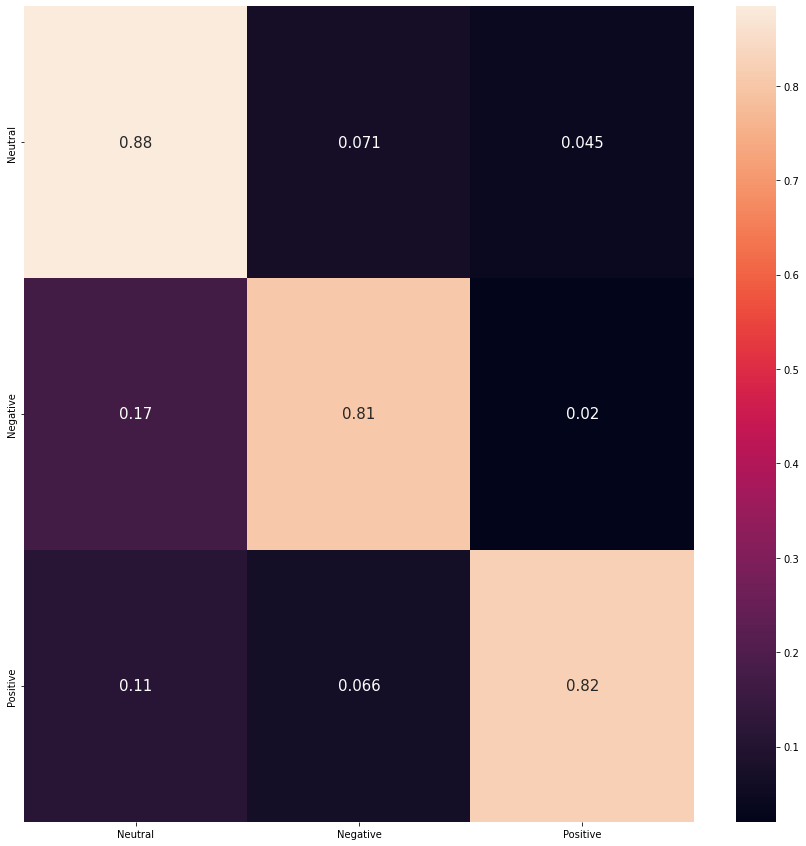

In [36]:
#Normalizing
conf_matrix = pd.DataFrame(matrix, index = ['Neutral','Negative','Positive'],columns = ['Neutral','Negative','Positive'])
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})